Binary category:
- Logistic Regression 
- steps are similar to multilinear regression. 
- Sigmoid 

Can model build with multilinear regression and binary regression 


0. Logistic Regression

Makes probability predictions for binary outcomes
The train-test versus statistical hypothesis testing and inference
Model Complexity is number of predictor variables (and interactions)
Generalization versus Overfitting
Machine Learning and Regularization

1. Binary Classification Binary Decison Trees

A. Regularization Tuning Parameters (or, technically, stopping parameters)
 a. Decison Tree Construction AKA Model Fitting
 b. What are Decison Trees?
 c. Interactions
  i. Feature Space partitions
  ii. Feature Importance
  iii. Partial Dependency Plots
  iv. Random Forests (of Bootstrapped Decision Trees)

2. Prediction, thresholding, and different Metrics

Self Evaluation #1: what's the correlation of your understanding versus the true of the following items?
AKA what's your 0%-100% (or, techically -100%-100%) understanding level for the following topics?

Bootstrapped Confidence Intervals
"Coin Flippling" sampling distribution hypothesis testing for "paired samples"
Calculating p-values based on observed statistics and "sampling distributions under the null"
Correlation
The normal "Simple Linear Regression" model
Fitting Simple Linear Regression models
Making predictions from linear models
Using Simple Linear Regression to evaluate the evidence of association between two continue variables
Assessming the assumptions of Simple Linear Regression using residuals
Hypothesis testing for two unpaired samples using a permutation test (as opposed to hypothesis testing based on differences for "paired samples")
Hypothesis testing for two groups (unpaired samples) using indicator variables in Simple Linear Regression
"Double" bootstrap confidence intervals estimating difference parameters for two groups (unpaired samples)
Self Evaluation #2: what's the correlation of your understanding versus the true of the following items?
AKA what's your 0%-100% (or, techically -100%-100%) understanding level for the following topics?

Multiple Linear Regression versus Simple Linear Regression
Binary indicator variables
Categorical variables
Interactions
Multicollinearity versus Statistical Inference
Multicollinearity versus Prediction
Logistic Regression
Classification veresus Regression
Machine Learning versus Statistical Inference
Classification Decision Trees versus Multiple Linear Regression
Classification Decision Trees versus Logistic Regression
Model Complexity and Overfitting
Model Complexity and Regularization Tuning Parameters
Student Lecture Summary

0. Restarting Logistic Regression with this new data set.

In [1]:
import pandas as pd 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                "marital-status", "occupation", "relationship", "race", "sex", 
                "capital-gain", "capital-loss", "hours-per-week", "native-country", 
                "income"]
data_raw = pd.read_csv(url, names=column_names, skipinitialspace=True)
data_use = data_raw.copy()
#data_use = data_use.drop(columns=['workclass', 'marital-status', 'occupation', 
#                                  'capital-gain', 'capital-loss', 'hours-per-week', 
#                                  'native-country', 'education-num', 'fnlwgt'])
display(data_use.head(), data_use.shape)


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

(32561, 15)

scikit-learn.org
Premier maschine learning 

spectrum of model complexity that tracks the amount of data we have. 

Don't have alot of data, stuck with simplier models. 

Regression, simplier models but can be interpreted because of their simplier form. 

Don't have alot of data, characterize uncertainty. 

Regression is where you predict a number 

logistic regression preducts a class: rich or poor. 
- logistic regression is not regression. It is classification.
- It has a linear model form, like linear regression.
- The language

Continuous data - multilinear regression
binary data - logistic regression. 



In [3]:
data_use.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [5]:
data_use.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [7]:
data_use.loc[data_use.education == 'Preschool', 'education'] = "<=6th"
data_use.loc[data_use.education == '1st-4th', 'education'] = "<=6th"
data_use.loc[data_use.education == '5th-6th', 'education'] = "<=6th"
data_use.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
<=6th             552
9th               514
12th              433
Doctorate         413
Name: count, dtype: int64

There is only 51 people who pre-school education. It would be weird to inclulde it as an indicator variable to predict the data. 
We are doing people who have less than 6th grade education. 

In [9]:
data_use.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
Groups of people / categories being used should be bigger numbers

In [11]:
data_use.loc[data_use.workclass == 'Without-pay', 'workclass'] = "?"
data_use.loc[data_use.workclass == 'Never-worked', 'workclass'] = "?"
data_use.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64

In [13]:
data_use.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [15]:
data_use.loc[data_use.occupation == 'Armed-Forces', 'occupation'] = "?"
data_use.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1852
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: count, dtype: int64

In [ ]:
#data_use['workclass-occupation'] = data_use.workclass + " " + data_use.occupation
#data_use['workclass-occupation'].value_counts()
#for i,k in zip(data_use['workclassoccupation'].value_counts().index,data_use['workclass-occupation'].value_counts().values):
#    print(i, k)

In [19]:
(data_use.workclass + " - " + data_use.occupation).value_counts().values

array([3195, 2942, 2833, 2740, 2691, 2313, 1913, 1843, 1273, 1266,  736,
        705,  531,  455,  430,  414,  400,  392,  385,  373,  317,  304,
        291,  283,  253,  214,  193,  190,  189,  180,  175,  175,  160,
        149,  146,  124,  122,  116,  115,  106,   68,   64,   57,   56,
         51,   50,   47,   41,   38,   36,   35,   31,   29,   28,   27,
         27,   26,   25,   23,   15,   15,   14,   14,   13,   13,   12,
         11,    9,    9,    8,    7,    6,    6,    5,    3,    3,    2,
          1,    1,    1,    1,    1])

Abandoned because wondering if there is a relation between working class and occupation. 

Here we are creating a bunch of small interactions. Not going to try this interaction because it creates really small groups. 

This would be over fitting, which can happen when small groups are being used to predict the data. 

Hesistant to making small groups predict big groups. 

0.2 The train-test versus statistical hypothesis testing and inference

In [22]:
from sklearn import model_selection
import numpy as np

np.random.seed(130)
train, test = model_selection.train_test_split(data_use, train_size=0.8)

The train test frame work should be completed right away. 

We used a train test data a different way in tutorial than we are doing. Using the sample method on half on the index. knowing the indices that are being trained and using the other. 

The more standard choice is to do an 80/20 split. Which provides more training data.

30k, 20% is a good chunk of data to train the model. 

The problem with using all the data to train the model means there is no test. 

If I put all my data into training my 

If I use all my data to fit my model I am going to use inference and confidence intervals.

Machine learning does not use all the data, it says 'show me' on test data. If I have a test set I am going to find out how good the model is. 

k-fold cross validation: fit the model 5 different ways and score 5 different models. 
- break your data into 5 chunks. and test each 20%. with each model. 

0. Logistic Regression

In [39]:
import statsmodels.formula.api as smf

formula = '''
I((income=='>50K').astype(int)) ~ scale(age) + I(scale(age)**2) + I(scale(age)**3)
                                + C(education, Treatment(reference='HS-grad'))
'''
logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.432964
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    26031
Method:                                          MLE   Df Model:                           16
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2146
Time:                                       13:53:22   Log-Likelihood:                -11278.
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -1.3034      0.035    -37.301      0.000      -1.372      -1.235
C(education, Treatment(reference='HS-grad'))[T.10th]            -0.8635      0.157     -5.486      0.000      -1.172      -0.555
C(education, Treatment(reference='HS-grad'))[T.11th]            -0.8512      0.159     -5.363      0.000      -1.162      -0.540
C(education, Treatment(reference='HS-grad'))[T.12th]            -0.2702      0.209     -1.291      0.197      -0.681       0.140
C(education, Treatment(reference='HS-grad'))[T.7th-8th]         -1.2964      0.192     -6.735      0.000      -1.674      -0.919
C(education, Treatment(reference='HS-grad'))[T.9th]             -1.3872      0.239     -5.794      0.000      -1.856      -0.918
C(education, Treatment(reference='HS-grad'))[T.<=6th]           -1.6323      0.251     -6.496      0.000      -2.125      -1.140
C(education, Treatment(reference='HS-grad'))[T.Assoc-acdm]       0.6479      0.088      7.381      0.000       0.476       0.820
C(education, Treatment(reference='HS-grad'))[T.Assoc-voc]        0.6408      0.078      8.244      0.000       0.488       0.793
C(education, Treatment(reference='HS-grad'))[T.Bachelors]        1.4257      0.046     30.967      0.000       1.335       1.516
C(education, Treatment(reference='HS-grad'))[T.Doctorate]        2.4653      0.132     18.619      0.000       2.206       2.725
C(education, Treatment(reference='HS-grad'))[T.Masters]          1.6510      0.064     25.839      0.000       1.526       1.776
C(education, Treatment(reference='HS-grad'))[T.Prof-school]      2.5736      0.114     22.559      0.000       2.350       2.797
C(education, Treatment(reference='HS-grad'))[T.Some-college]     0.4112      0.048      8.643      0.000       0.318       0.504
scale(age)                                                       1.0404      0.029     36.226      0.000       0.984       1.097
I(scale(age) ** 2)                                              -0.8932      0.034    -26.448      0.000      -0.959      -0.827
I(scale(age) ** 3)                                               0.1498      0.012     12.017      0.000       0.125       0.174
================================================================================================================================
"""

Looks exactly like linear multi regression. The formula looks the same but the outcome is different. 
Checking if income > 50k. less than or equal is the 0 cateogory. 

When you're young, you make no money.
When you're an adult, you make more money.
When you're senior, you make no money. 

also different education they have.

Putting higher order terms allows you to have access to different polynomial shapes. 

The more predictors, the more correlation. but, more collinearity. 



0.1 Makes probability predictions for binary outcomes


In [43]:
import numpy as np
# np.corrcoef((train.income=='>50K'),(logreg_fit.predict(train)>0.5))#**2

# This is correlation between y and y_hat
np.corrcoef((train.income=='>50K'),(logreg_fit.predict(train)))[0]**2

array([1.        , 0.22237051])

Working with the train data sample. 

The $R^2$

Comparing a given person is rich or poor and how it correlates with our model predcition. 

logreg_fit.predict(train)>0.5
- Output is a probability
- 0 is less than
- 1 more than 50k

The 0.5 goes with the models best guess.

What is R^2 in regression?
- The porportion of variability in the y data that gets explained by the model.

- Take the average y and find the variability of y from it.

- Take the line of best fit, find the variability of y from the line of best fit.

How to calculate R^2.
- .fit.summary
- math
- correlation coefficient between (y and y_hat)^2

This is the correlation between y andy_hat: np.corrcoef((train.income=='>50K'),(logreg_fit.predict(train)>0.5))#**2

Now y's are 0 and 1, instead of continuous data. Pseudo R-squared. 

Y_hat is the probability. 


In [32]:
logreg_fit.predict(train)>0.5

23255     True
17469    False
29534     True
3798     False
31338     True
         ...  
24074     True
9459     False
24349    False
23669    False
24985    False
Length: 26048, dtype: bool

In [30]:
from scipy import stats
stats.spearmanr((train.income=='>50K'),(logreg_fit.predict(train)>0.5))#[0]**2

SignificanceResult(statistic=0.364080941871207, pvalue=0.0)

0.2 The train-test versus statistical hypothesis testing and inference


In [50]:
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]


0.7867342238599724

In [72]:
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0]


0.8403716216216216

((train.income=='>50K')==(logreg_fit.predict(train)>0.75)).sum()/train.shape[0]

Changes what you consider to be a 1. this is number 0.75 is is you're sure the number is a 1. 


You're right about 79% of the time. 
predict make more than 50k and they do.
predict make more than 50k and they don't.
predict make less than 50k and they do.
predict make less than 50k and they don't.

What is wrong with in sample performance? 
- Making model on data, and using the same data to see if its predicting.
- We want to try it on a new sample.

0.3 Model Complexity is number of predictor variables (and interactions)

In [53]:
train["sex"].value_counts()

sex
Male      17442
Female     8606
Name: count, dtype: int64

In [74]:
train["marital-status"].value_counts()

marital-status
Married-civ-spouse       11985
Never-married             8532
Divorced                  3540
Separated                  833
Widowed                    790
Married-spouse-absent      348
Married-AF-spouse           20
Name: count, dtype: int64

Normally would not use this because there is a small group of 20 people which we would not like to use to predict. 

In [76]:
train.relationship.value_counts()

relationship
Husband           10545
Not-in-family      6674
Own-child          4024
Unmarried          2762
Wife               1260
Other-relative      783
Name: count, dtype: int64

In [59]:
train.race.value_counts()

race
White                 22255
Black                  2467
Asian-Pac-Islander      863
Amer-Indian-Eskimo      248
Other                   215
Name: count, dtype: int64

In [61]:
formula = '''
I((income=='>50K').astype(int)) ~ scale(age) + I(scale(age)**2) + I(scale(age)**3)
                                + scale(Q("education-num"))
                                + C(education, Treatment(reference='HS-grad'))
                                + C(Q("marital-status"), Treatment(reference='Married-civ-spouse')) 
                                + C(relationship, Treatment(reference='Husband'))
                                + C(sex, Treatment(reference='Male')) 
                                + C(race, Treatment(reference='White'))
                                + C(workclass) + C(occupation)
'''
# number of years of education. discrete number with a straight line relationship
# is there a lienar relationship?
# Group of education. Off set of different groups.
# offsets of differnet groups based on that. 

logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

# Choose the baseline based on what you want. 
# Can choose is the most data on. 

Optimization terminated successfully.
         Current function value: 0.344157
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    25995
Method:                                          MLE   Df Model:                           52
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3757
Time:                                       13:58:15   Log-Likelihood:                -8964.6
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
==============================================================================================================================================================
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     -0.5108      0.544     -0.940      0.347      -1.576       0.555
C(education, Treatment(reference='HS-grad'))[T.10th]                                           1.0552      1.468      0.719      0.472      -1.821       3.932
C(education, Treatment(reference='HS-grad'))[T.11th]                                           0.4801      0.986      0.487      0.626      -1.453       2.413
C(education, Treatment(reference='HS-grad'))[T.12th]                                           0.3962      0.535      0.740      0.459      -0.653       1.445
C(education, Treatment(reference='HS-grad'))[T.7th-8th]                                        1.6833      2.439      0.690      0.490      -3.096       6.463
C(education, Treatment(reference='HS-grad'))[T.9th]                                            1.1730      1.960      0.598      0.550      -2.668       5.014
C(education, Treatment(reference='HS-grad'))[T.<=6th]                                          2.4542      3.077      0.797      0.425      -3.578       8.486
C(education, Treatment(reference='HS-grad'))[T.Assoc-acdm]                                    -1.2464      1.462     -0.853      0.394      -4.112       1.619
C(education, Treatment(reference='HS-grad'))[T.Assoc-voc]                                     -0.6861      0.976     -0.703      0.482      -2.600       1.227
C(education, Treatment(reference='HS-grad'))[T.Bachelors]                                     -1.2390      1.945     -0.637      0.524      -5.052       2.574
C(education, Treatment(reference='HS-grad'))[T.Doctorate]                                     -1.8438      3.407     -0.541      0.588      -8.521       4.833
C(education, Treatment(reference='HS-grad'))[T.Masters]                                       -1.5185      2.432     -0.624      0.532      -6.285       3.248
C(education, Treatment(reference='HS-grad'))[T.Prof-school]                                   -1.2943      2.920     -0.443      0.658      -7.018       4.429
C(education, Treatment(reference='HS-grad'))[T.Some-college]                                  -0.2749      0.489     -0.562      0.574      -1.233       0.684
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Divorced]                 -2.3969      0.281     -8.534      0.000      -2.947      -1.846
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Married-AF-spouse]         0.6660      0.521      1.278      0.201      -0.355       1.687
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Married-spouse-ab

First model all very good p-values 
This model has more non-significant relationships.. 

multicollinearity is probably the reason for this. This messes up your statistical power. So many predicators in this model. High multicolllinearity. Still have a very good predictive model possible. 

In sample and out of samples train test say that it predicts the data better in the next lines of code. This model does not have all best p-values for every relationship but it predicts better. 

This is what machine learning is. Never cared about p-values, just wants it to predict. The model can be complex and over fit. Not concered with over fitting becuase it predicting new data. passes the train test. 

Not much overfitting. 

In terms of prediction -> generalizing. 


# Exam Questions 
# Can you make predictions using a Classification Decision Tree? Can you make a Confusion Matrix using a Classification Decision Tree?

# Are you wielder of Model Complexity, Machine Learning, and Thresholding?




0.4 Generalization versus Overfitting

In [81]:
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0]


0.8403716216216216

In [83]:
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]


0.831260555811454

In [85]:
formula = '''
I((income=='>50K').astype(int)) ~ scale(age) * I(scale(age)**2) 
                                * scale(Q("education-num")) 
                                * C(race, Treatment(reference='White'))
                                * C(sex, Treatment(reference='Male')) 
                                + C(education, Treatment(reference='HS-grad'))
                                + C(Q("marital-status"), Treatment(reference='Married-civ-spouse')) 
                                + C(relationship, Treatment(reference='Husband'))
                                + C(workclass) + C(occupation)
'''
logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.342364
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    25925
Method:                                          MLE   Df Model:                          122
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3789
Time:                                       14:19:38   Log-Likelihood:                -8917.9
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
=====================================================================================================================================================================================================================================
                                                                                                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                            -0.4944      0.559     -0.885      0.376      -1.590       0.601
C(race, Treatment(reference='White'))[T.Amer-Indian-Eskimo]                                                                                                          -0.4207      0.385     -1.093      0.275      -1.175       0.334
C(race, Treatment(reference='White'))[T.Asian-Pac-Islander]                                                                                                          -0.4398      0.207     -2.122      0.034      -0.846      -0.034
C(race, Treatment(reference='White'))[T.Black]                                                                                                                       -0.0750      0.133     -0.564      0.573      -0.336       0.186
C(race, Treatment(reference='White'))[T.Other]                                                                                                                       -0.3467      0.511     -0.679      0.497      -1.348       0.655
C(sex, Treatment(reference='Male'))[T.Female]                                                                                                                        -1.0039      0.115     -8.699      0.000      -1.230      -0.778
C(education, Treatment(reference='HS-grad'))[T.10th]                                                                                                                  1.0740      1.509      0.712      0.477      -1.884       4.033
C(education, Treatment(reference='HS-grad'))[T.11th]                                                                                                                  0.5103      1.014      0.503      0.615      -1.476       2.497
C(education, Treatment(reference='HS-grad'))[T.12th]                                                                                                                  0.4261      0.549      0.777      0.437      -0.649       1.502
C(education, Treatment(reference='HS-grad'))[T.7th-8th]                                                                                                               1.7202      2.507      0.686      0.493      -3.194       6.634
C(education, Treatment(reference='HS-grad'))[T.9th]                                                                 

A very complex model.

bad p-values

Machine learning people don't care about that. They care about the prediction. 

This model predicts in sample and out sample.



In [87]:
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0]


0.8417536855036855

In [89]:
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]


0.833256563795486

0.1 Makes probability predictions for binary outcomes


0.2 The train-test versus statistical hypothesis testing and inference


0.3 Model Complexity is number of predictor variables (and interactions)


0.4 Generalization versus Overfitting

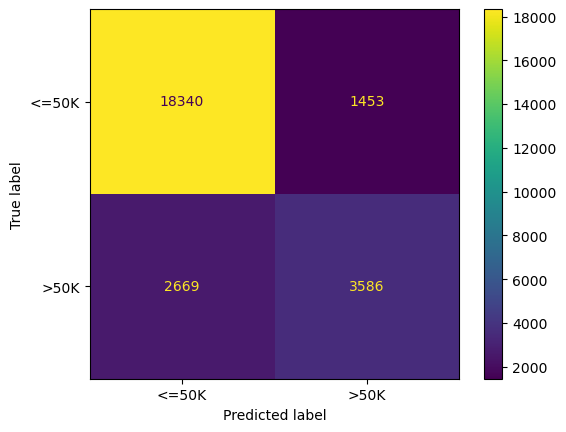

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), logreg_fit.predict(train)>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

Left
- True negative
- False Negative

Right 
- 
- True positive
- True negative

We really care about the 
- accuracy
- specificity
- Sensitivity
- Precision
- 

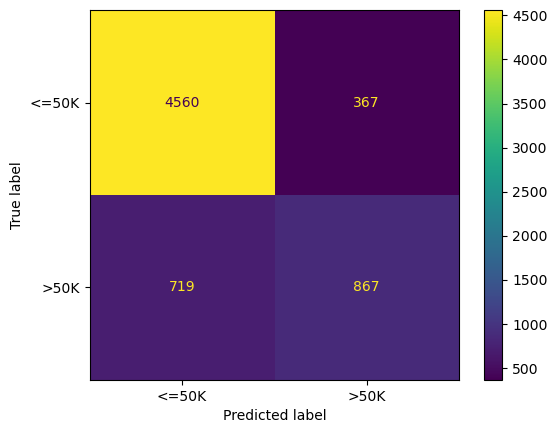

In [96]:
# We really care about the test data confusion matrix. 
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), logreg_fit.predict(test)>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

# Must be able to interpret the confusion matrix. 

In [101]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# in sklearn specificity is recall_score(y_true, y_pred, pos_label=0)
# while sensitivity recall_score(y_true, y_pred, pos_label=1) is the default 

print("In sample (training) sensitivity", recall_score(train.income=='>50K', logreg_fit.predict(train)>0.5, pos_label=True))
print("Out of sample (testing) sensitivity", recall_score(test.income=='>50K', logreg_fit.predict(test)>0.5, pos_label=True))
print("In sample (training) specificity", recall_score(train.income=='>50K', logreg_fit.predict(train)>0.5, pos_label=False))
print("Out of sample (testing) specificity", recall_score(test.income=='>50K', logreg_fit.predict(test)>0.5, pos_label=False))
print("In sample (training) precision", precision_score(train.income=='>50K', logreg_fit.predict(train)>0.5))
print("Out of sample (testing) precision", precision_score(test.income=='>50K', logreg_fit.predict(test)>0.5))

In sample (training) sensitivity 0.5733013589128697
Out of sample (testing) sensitivity 0.5466582597730139
In sample (training) specificity 0.9265902086596272
Out of sample (testing) specificity 0.9255124822407145
In sample (training) precision 0.7116491367334788
Out of sample (testing) precision 0.7025931928687196


In [105]:
X_train = pd.get_dummies(train.iloc[:,:-1]).astype(float)
X_test = X_train[:0].copy()
X_test_tmp = pd.get_dummies(test.iloc[:,:-1])
for col in X_test_tmp:
    X_test[col] = X_test_tmp[col].astype(float)
X_test = X_test.fillna(0.0)

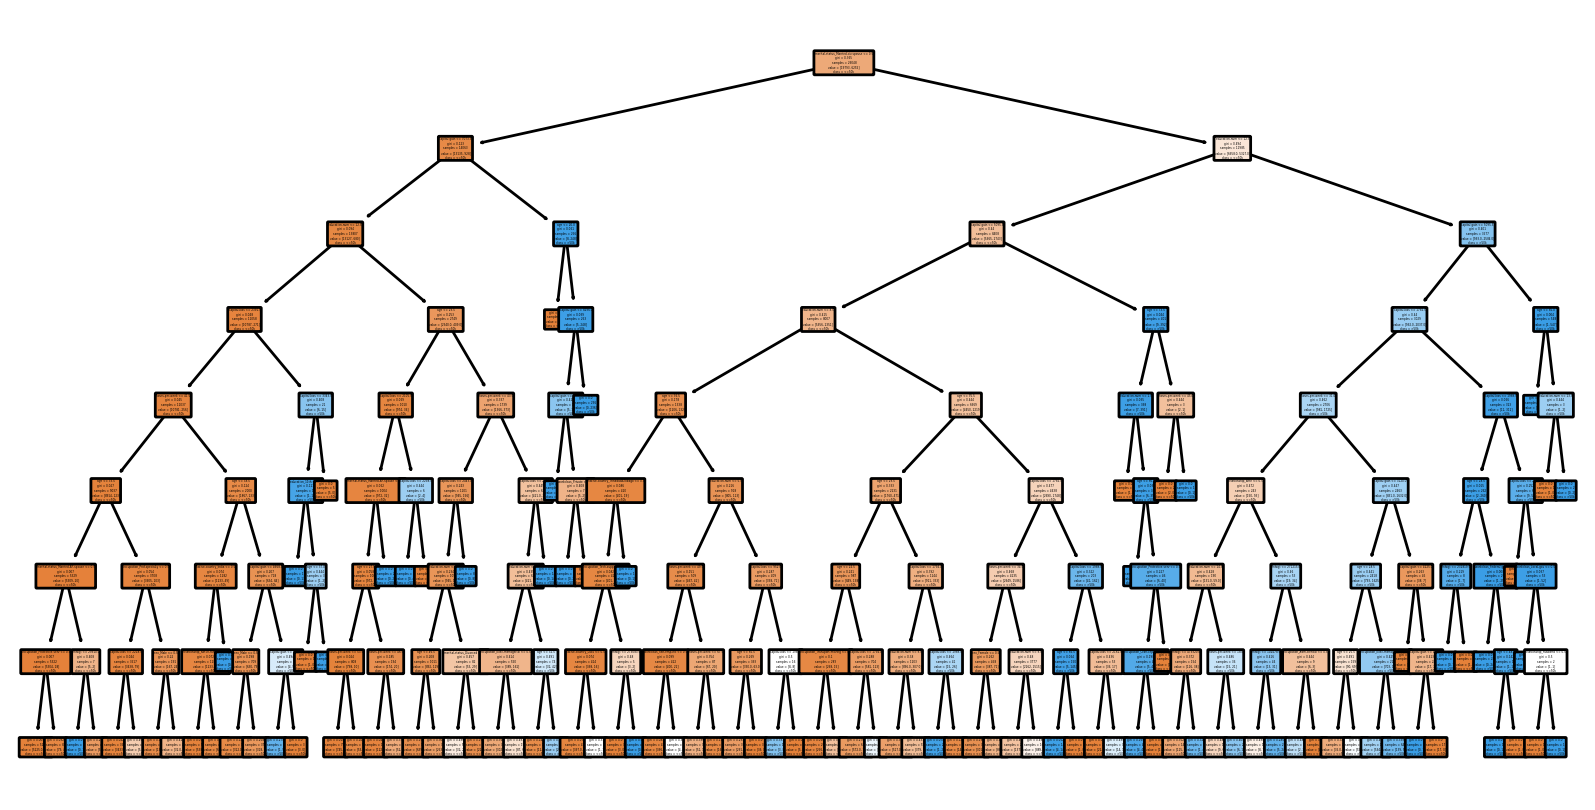

In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

A decision tree is only interaction, it is a very complex model. 

# A decision tree is an interaction model 

The decision tree first splits the data.

You can see the block version with red and blue dots inside it. 


In [111]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]


0.8610641891891891

In [113]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]


0.8539843390142792

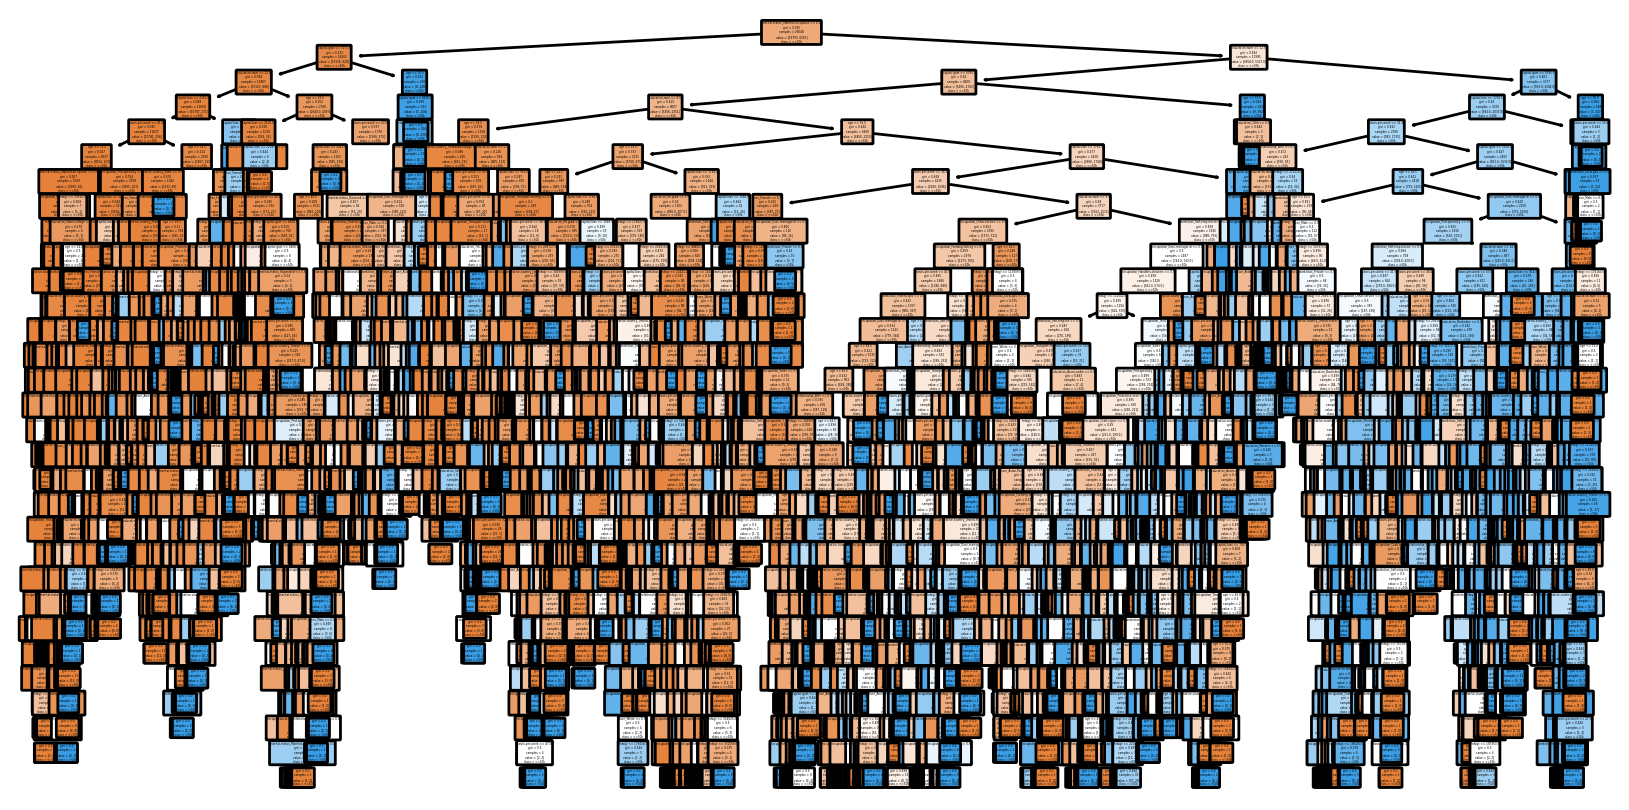

In [116]:
clf = DecisionTreeClassifier(max_depth=30, random_state=42)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

In [117]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]


0.9893273955773956

In [121]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]


0.8238906801781053

In [123]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

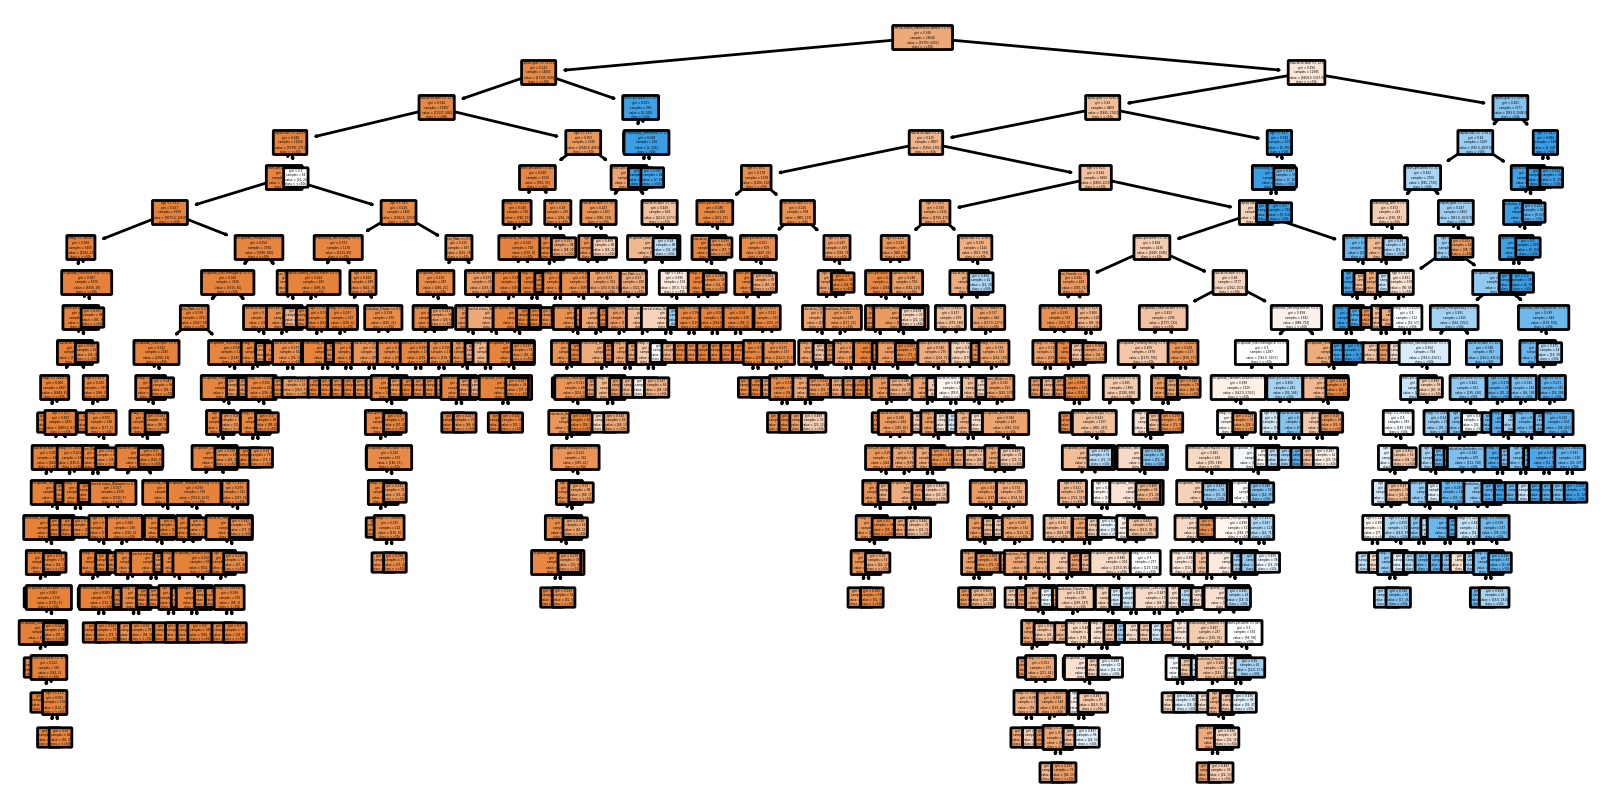

In [125]:
clf = DecisionTreeClassifier(max_depth=30, random_state=42, 
                             min_samples_leaf=30, 
                             min_samples_split=100)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

In [126]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]

0.8719671375921376

In [129]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]

0.8506064793489944

Look at every variable and choose the best predicting for the first decision.

Then go to each two nodes. and find the best predicting variable each one on both nodes. 

We have a bunch of 0 and 1's. we push them both left or right. 

Changed this last model by regulating the tree.
- Can't make new nodes if there is not at least 100 data points in the parent.
- Can't make a new node if the are not 30

In [131]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

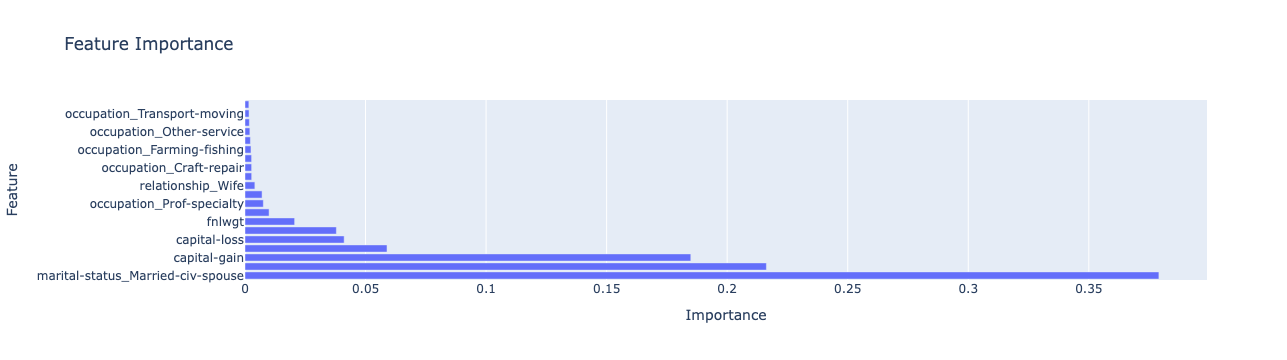

In [133]:
import plotly.express as px

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index()

fig = px.bar(feature_importance_df[:20], y='Feature', x='Importance', 
             title='Feature Importance')
fig.show()

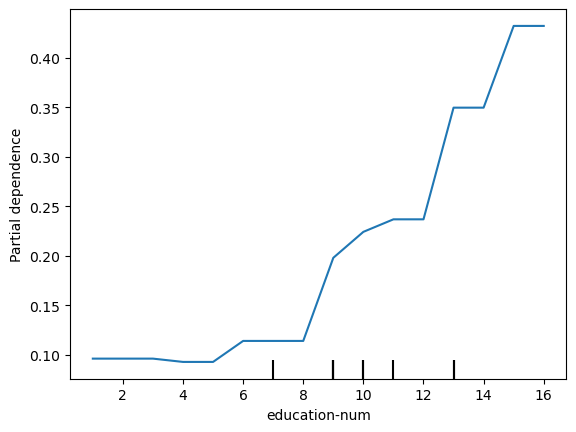

In [135]:
from sklearn.inspection import PartialDependenceDisplay

# X_train.columns=='education-num' # 2
_ = PartialDependenceDisplay.from_estimator(clf, X_train, (2,))

Machone learning models are uninterpretable. 
Probability prediction changes as your num of years of education changes. 

I don't love that machine learning mdoels arnt interpretable becuase this above is interpretable. 

Bootstrapp the data. 
Lots of samples 
make them all predict.
Take the best majority. 

In [139]:
RandomForestClassifier?

Object `RandomForestClassifier` not found.


In [141]:
from sklearn.ensemble import RandomForestClassifier

# Fit 1000 Decision Trees with unlimited depth
rfc = RandomForestClassifier(n_estimators=1000, random_state=1,
                             min_samples_leaf=10, min_samples_split=30) # got to have this rule. 
rfc.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

RandomForestClassifier(min_samples_leaf=10, min_samples_split=30,
                       n_estimators=1000, random_state=1)

In [143]:
((train.income=='>50K')==rfc.predict(X_train)).sum()/train.shape[0]


0.8693565724815725

In [145]:
((test.income=='>50K')==rfc.predict(X_test)).sum()/test.shape[0]


0.855980346998311

In [ ]:
# machine learning, working so hard to get a little more better at predicting. 

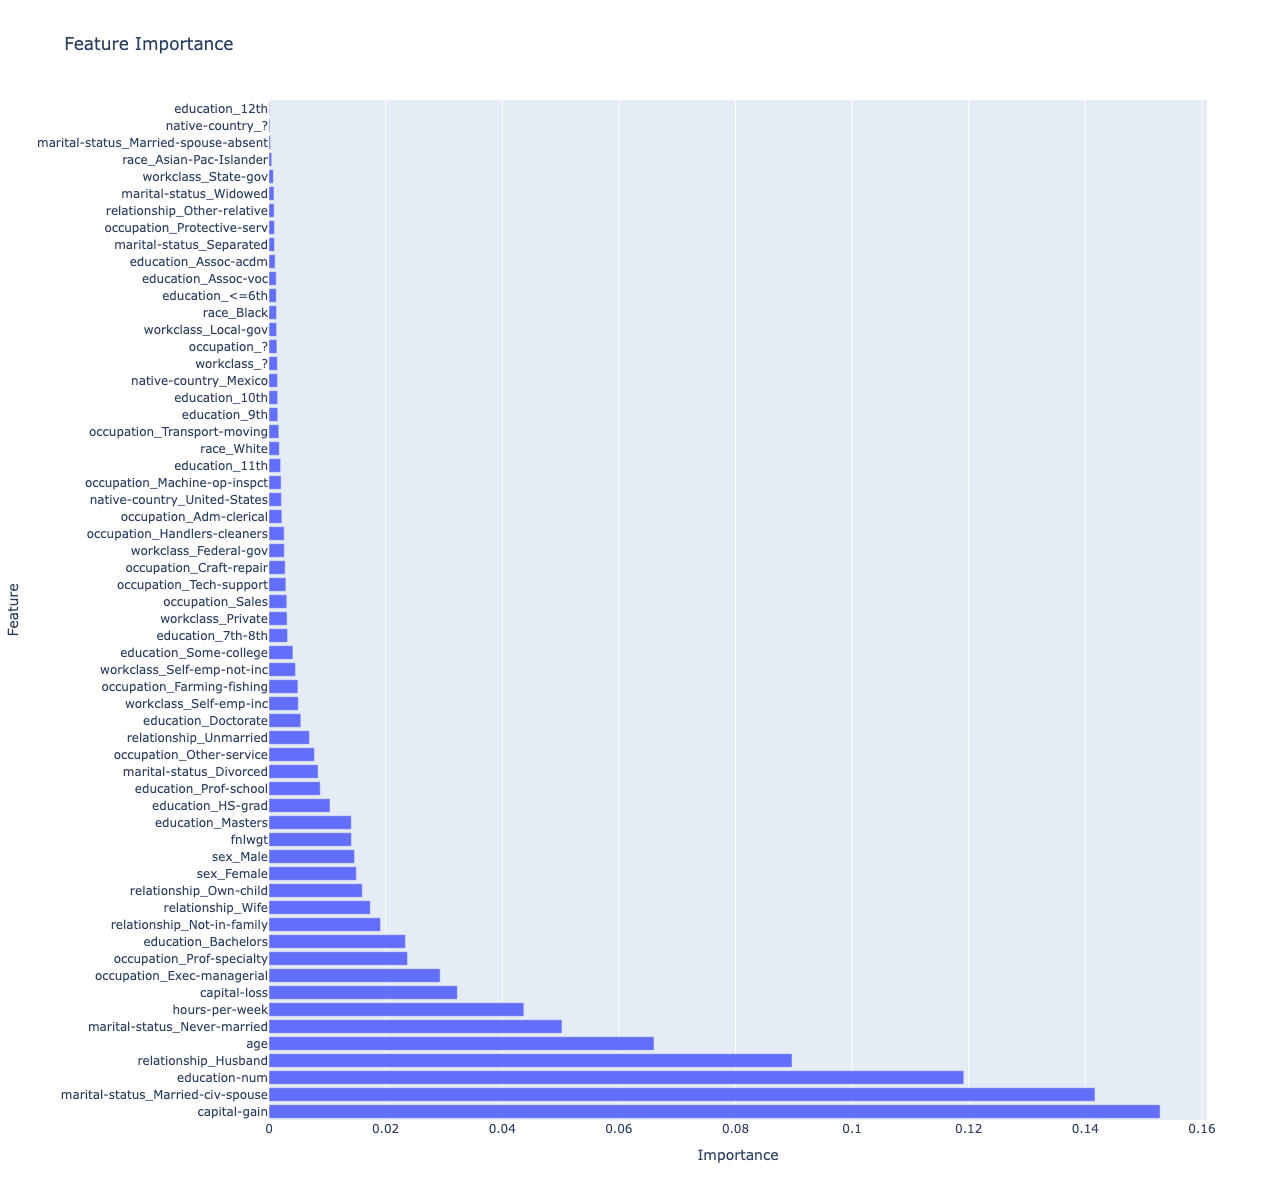

In [147]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index()

fig = px.bar(feature_importance_df[:60], y='Feature', x='Importance', 
             title='Feature Importance',
              width=800, height=1200)
fig.show()

In [ ]:
_ = PartialDependenceDisplay.from_estimator(rfc, X_train, (2,))


In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), clf.predict(X_train)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), rfc.predict(X_train)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), clf.predict(X_test)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict(X_test)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.8, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.2, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()